<a href="https://colab.research.google.com/github/Btexxx/Bharat-Intern/blob/main/task3_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data= pd.read_csv("train.csv")
test_data = pd.read_csv("test_t.csv")

In [ ]:
train_data.shape

(8597, 785)

In [ ]:
print("Dimensions: ",test_data.shape, "\n")

Dimensions:  (8613, 784) 



In [ ]:
print(test_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8613 entries, 0 to 8612
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(369), int64(415)
memory usage: 51.5 MB
None


In [ ]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_data.isnull().sum().head(10)

label     0
pixel0    0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
pixel5    0
pixel6    0
pixel7    0
pixel8    0
dtype: int64

In [ ]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,8597.000000,8597.0,8597.0,8597.0,8597.0,8597.0,8597.0,8597.0,8597.0,8597.0,...,8596.000000,8596.000000,8596.000000,8596.0,8596.0,8596.0,8596.0,8596.0,8596.0,8596.0
mean,4.442247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.157748,0.117729,0.019777,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.889234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.548413,4.826349,1.434903,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,130.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_data.info

<bound method DataFrame.info of       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0         1       0       0       0       0       0       0       0       0   
1         0       0       0       0       0       0       0       0       0   
2         1       0       0       0       0       0       0       0       0   
3         4       0       0       0       0       0       0       0       0   
4         0       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
8592      0       0       0       0       0       0       0       0       0   
8593      6       0       0       0       0       0       0       0       0   
8594      8       0       0       0       0       0       0       0       0   
8595      7       0       0       0       0       0       0       0       0   
8596      1       0       0       0       0       0       0       0       0   

      pixel8  ...  

In [ ]:
train_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [ ]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Text(0.5, 1.0, 'Digit 7')

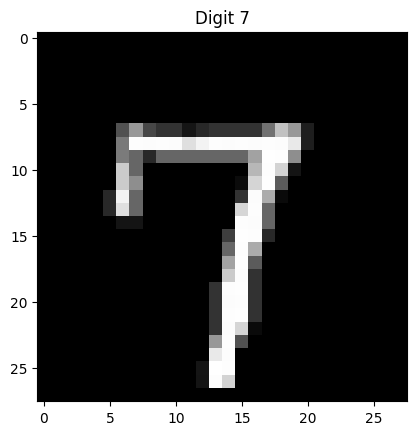

In [ ]:
seven = train_data.iloc[6, 1:]
seven.shape
seven = seven.values.reshape(28, 28)
plt.imshow(seven, cmap='gray')
plt.title("Digit 7")

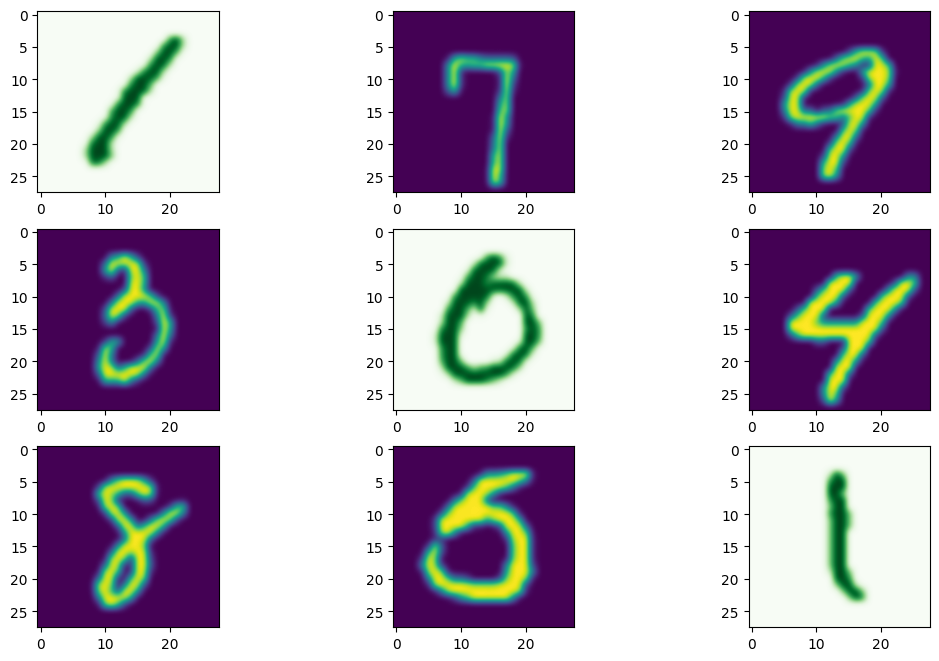

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(13, 8))
ax[0,0].imshow(X[0], cmap = 'Greens', interpolation='bicubic')
ax[0,1].imshow(X[50], cmap = 'viridis', interpolation='bicubic')
ax[0,2].imshow(X[100], cmap = 'viridis', interpolation='bicubic')
ax[1,0].imshow(X[150], cmap = 'viridis', interpolation='bicubic')
ax[1,1].imshow(X[200], cmap = 'Greens', interpolation='bicubic')
ax[1,2].imshow(X[250], cmap = 'viridis', interpolation='bicubic')
ax[2,0].imshow(X[300], cmap = 'viridis', interpolation='bicubic')
ax[2,1].imshow(X[350], cmap = 'viridis', interpolation='bicubic')
ax[2,2].imshow(X[400], cmap = 'Greens', interpolation='bicubic')

Text(0.5, 1.0, 'Digit 4')

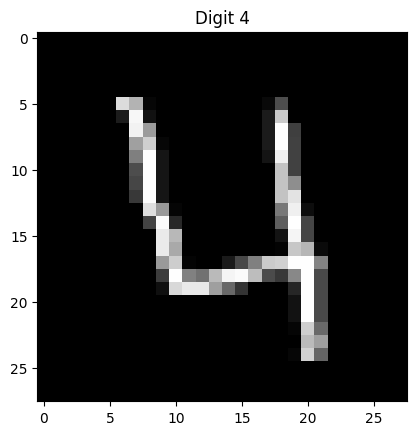

In [ ]:
four = train_data.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

In [ ]:
y = train_data['label']

X = train_data.drop(columns = 'label')

print(train_data.shape)

(38434, 785)


In [ ]:
round(train_data.drop('label', axis=1).mean(), 2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

In [ ]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [ ]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.910675570202064 

[[1060    0    2    0    7   14    5    0    3    0]
 [   0 1261    4    4    1    1    1    1    9    2]
 [  14   10 1083   17   12    4   19   14   15    5]
 [   8    3   27 1062    6   48    3    5   17    7]
 [   6    5   18    2  972    2    7   11    3   23]
 [  13   13    8   59   10  911   22    0   25    4]
 [  11    2   14    1    7   16 1081    0    1    0]
 [   2   16   10   13   20    3    1 1139    0   44]
 [   7   23   13   49    2   38   13    5  947   17]
 [   5    4    6   13   73    4    1   68    9  985]]
